# Tarea - Ajuste de curvas 
## Daniel Orozco

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

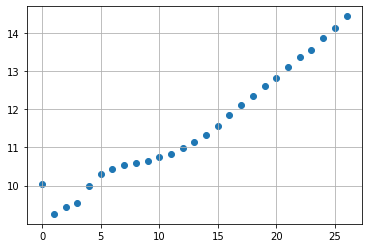

In [3]:
x = np.linspace(0, 26, 27)
y = data
plt.figure()
plt.scatter(x,y)
plt.grid()

In [4]:
def funcion_de_costo_1(beta, X, y) :
    
    beta = np.reshape(beta, [2,-1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0,0]

def funcion_de_costo_2(beta, X, y) :
    
    beta = np.reshape(beta, [3,-1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0,0]

def funcion_de_costo_3(beta, X, y) :
    
    beta = np.reshape(beta, [4,-1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0,0]

In [5]:
n = len(y)
ones = np.ones([n,1])

y = np.reshape(y, [n,-1])
x_1 = np.reshape(x, [n,-1])
x_2 = np.reshape(x**2, [n,-1])
x_3 = np.reshape(x**3, [n,-1])

In [6]:
# grado 1
beta_inicial_1 = np.random.rand(2)
X_1 = np.hstack((ones, x_1))
funcion_de_costo_1(beta_inicial_1, X_1, y)

sol_1 = opt.minimize(funcion_de_costo_1,
                   beta_inicial_1,
                   args=(X_1,y))
sol_1

      fun: 2.370488951817882
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([5.42402267e-06, 7.83801079e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567668, 0.18667054])

In [7]:
# grado 2
beta_inicial_2 = np.random.rand(3)
X_2 = np.hstack((ones, x_1, x_2))
funcion_de_costo_2(beta_inicial_2, X_2, y)

sol_2 = opt.minimize(funcion_de_costo_2,
                   beta_inicial_2,
                   args=(X_2,y))
sol_2

      fun: 0.8443845194020215
 hess_inv: array([[ 1.44243157e-01, -2.17596422e-02,  6.84288668e-04],
       [-2.17596422e-02,  4.57494601e-03, -1.64219621e-04],
       [ 6.84288668e-04, -1.64219621e-04,  6.31612151e-06]])
      jac: array([2.75671482e-07, 5.34206629e-06, 1.13517046e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 136
      nit: 9
     njev: 31
   status: 2
  success: False
        x: array([9.59128645e+00, 7.25241274e-02, 4.39024724e-03])

In [8]:
# grado 3
beta_inicial_3 = np.random.rand(4)
X_3 = np.hstack((ones, x_1, x_2, x_3))
funcion_de_costo_3(beta_inicial_3, X_3, y)

sol_3 = opt.minimize(funcion_de_costo_3,
                   beta_inicial_3,
                   args=(X_3,y))
sol_3

      fun: 0.840434669657377
 hess_inv: array([[ 2.27242124e-01, -6.41070436e-02,  4.83390523e-03,
        -1.06401988e-04],
       [-6.41070436e-02,  2.62147398e-02, -2.28522537e-03,
         5.43889291e-05],
       [ 4.83390523e-03, -2.28522537e-03,  2.14212764e-04,
        -5.33113727e-06],
       [-1.06401988e-04,  5.43889291e-05, -5.33113727e-06,
         1.36707611e-07]])
      jac: array([ 4.83542681e-06,  1.40815973e-05, -2.36034393e-05, -2.52567232e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 202
      nit: 9
     njev: 38
   status: 2
  success: False
        x: array([9.56752310e+00, 8.46496827e-02, 3.20206192e-03, 3.04663111e-05])

In [9]:
y_pred_1 = 9.11567633 + 0.18667056*x
y_pred_2 = 9.59128988 + 7.25235953e-02*x + 4.39027583e-03*x**2
y_pred_3 = 9.56629019 + 8.49363829e-02*x + .00318277955*x**2 + .0000308596606*x**3

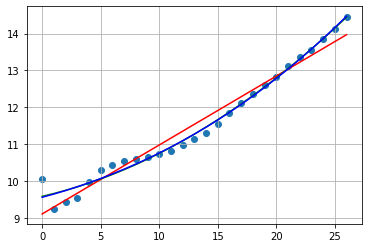

In [10]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, y_pred_1, "r")
plt.plot(x, y_pred_2, "g")
plt.plot(x, y_pred_3, "b") 
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [11]:
pdata = pd.read_csv("population_data.csv")
pdata.tail()

,Year,Poblacion,Nacimientos,Decesos
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641
65,2015,121005,2353596,655694


In [12]:
#población
y0 = pdata["Poblacion"]
y = np.array(y0)
n = len(y)
x = np.linspace(0, n-1, n)

In [13]:
n = len(y)
ones = np.ones([n,1])

y = np.reshape(y, [n,-1])
x_1 = np.reshape(x, [n,-1])
x_2 = np.reshape(x**2, [n,-1])
x_3 = np.reshape(x**3, [n,-1])

In [14]:
# grado 1
beta_inicial_1 = np.random.rand(2)
X_1 = np.hstack((ones, x_1))
funcion_de_costo_1(beta_inicial_1, X_1, y)

sol_1 = opt.minimize(funcion_de_costo_1,
                   beta_inicial_1,
                   args=(X_1,y))
sol_1

      fun: 212137169.54473728
 hess_inv: array([[ 1.54575521e-06, -1.18107172e-06],
       [-1.18107172e-06,  1.36020028e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 99
      nit: 11
     njev: 33
   status: 0
  success: True
        x: array([24138.01061649,  1543.97352429])

In [15]:
# grado 2
beta_inicial_2 = np.random.rand(3)
X_2 = np.hstack((ones, x_1, x_2))
funcion_de_costo_2(beta_inicial_2, X_2, y)

sol_2 = opt.minimize(funcion_de_costo_2,
                   beta_inicial_2,
                   args=(X_2,y))
sol_2

      fun: 210941621.44631422
 hess_inv: array([[ 4.58419456e-02, -2.92371390e-03,  3.79839682e-05],
       [-2.92371390e-03,  2.71241573e-04, -4.04050473e-06],
       [ 3.79839682e-05, -4.04050473e-06,  6.44272219e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 10
     njev: 19
   status: 0
  success: True
        x: array([2.44255828e+04, 1.51701372e+03, 4.14765801e-01])

In [16]:
# grado 3
beta_inicial_3 = np.random.rand(4)
X_3 = np.hstack((ones, x_1, x_2, x_3))
funcion_de_costo_3(beta_inicial_3, X_3, y)

sol_3 = opt.minimize(funcion_de_costo_3,
                   beta_inicial_3,
                   args=(X_3,y))
sol_3

      fun: 25240442.647678778
 hess_inv: array([[ 1.08444693e-01, -1.24112731e-02,  3.78926999e-04,
        -3.37473092e-06],
       [-1.24112731e-02,  1.95479689e-03, -6.78474185e-05,
         6.47904619e-07],
       [ 3.78926999e-04, -6.78474185e-05,  2.52028678e-06,
        -2.51115033e-08],
       [-3.37473092e-06,  6.47904619e-07, -2.51115033e-08,
         2.57559768e-10]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([ 2.84777821e+04,  7.39076313e+02,  3.05649582e+01, -3.09232630e-01])

In [17]:
y_pred_1 = 24138.023373 + 1543.97324206*x
y_pred_2 = 2.44256125e+04 + 1.51701202e+03*x + 4.14786622e-01*x**2
y_pred_3 = 2.84777438e+04 + 7.39080553e+02*x + 3.05648309e+01*x**2 + -3.09231508e-01*x**3

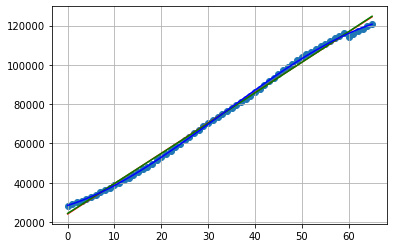

In [18]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, y_pred_1, "r")
plt.plot(x, y_pred_2, "g")
plt.plot(x, y_pred_3, "b") 
plt.grid()

In [19]:
# nacimientos
y0 = pdata["Nacimientos"]
y = np.array(y0)
y = np.reshape(y, [n,-1])

In [20]:
# grado 1
beta_inicial_1 = np.random.rand(2)
X_1 = np.hstack((ones, x_1))
funcion_de_costo_1(beta_inicial_1, X_1, y)

sol_1 = opt.minimize(funcion_de_costo_1,
                   beta_inicial_1,
                   args=(X_1,y))
sol_1

      fun: 4737913011184.608
 hess_inv: array([[ 1.99850127e-02, -4.57971758e-04],
       [-4.57971758e-04,  1.58807797e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 7
     njev: 17
   status: 0
  success: True
        x: array([1562781.60084032,   21981.12191327])

In [21]:
# grado 2
beta_inicial_2 = np.random.rand(3)
X_2 = np.hstack((ones, x_1, x_2))
funcion_de_costo_2(beta_inicial_2, X_2, y)

sol_2 = opt.minimize(funcion_de_costo_2,
                   beta_inicial_2,
                   args=(X_2,y))
sol_2

      fun: 492921099843.4104
 hess_inv: array([[ 3.50038572e-06, -2.28843078e-09, -5.73342395e-09],
       [-2.28843078e-09,  1.18145138e-09, -6.44923004e-12],
       [-5.73342395e-09, -6.44923004e-12,  2.78798271e-09]])
      jac: array([      0.,   -4096., -131072.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 261
      nit: 15
     njev: 63
   status: 2
  success: False
        x: array([ 1.02102745e+06,  7.27828576e+04, -7.81625174e+02])

In [22]:
# grado 3
beta_inicial_3 = np.random.rand(4)
X_3 = np.hstack((ones, x_1, x_2, x_3))
funcion_de_costo_3(beta_inicial_3, X_3, y)

sol_3 = opt.minimize(funcion_de_costo_3,
                   beta_inicial_3,
                   args=(X_3,y))
sol_3

      fun: 441782327467.31213
 hess_inv: array([[ 1.05164029e-02, -5.06724973e-09, -1.86166303e-05,
         2.63762816e-07],
       [-5.06724973e-09,  1.23945298e-09, -4.86897606e-11,
         4.87607567e-13],
       [-1.86166303e-05, -4.86897606e-11,  1.07347997e-07,
        -1.79329337e-09],
       [ 2.63762816e-07,  4.87607567e-13, -1.79329337e-09,
         3.09244130e-11]])
      jac: array([      0.,       0.,   20480., 1257472.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 362
      nit: 11
     njev: 70
   status: 2
  success: False
        x: array([ 1.08839088e+06,  5.98654880e+04, -2.81164942e+02, -5.13207990e+00])

In [23]:
y_pred_1n = 1562503.98901133 + 21986.82772328*x
y_pred_2n = 1.02101640e+06 + 7.27828622e+04*x + -7.81620699e+02*x**2
y_pred_3n = 1.08872095e+06 + 5.98278427e+04*x + -2.80028350e+02*x**2 + -5.14222267*x**3

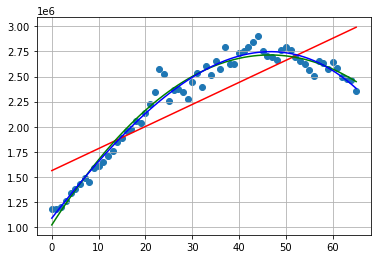

In [24]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, y_pred_1n, "r")
plt.plot(x, y_pred_2n, "g")
plt.plot(x, y_pred_3n, "b") 
plt.grid()